In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
np.random.seed(42)

In [3]:
n_A = 10000
n_B = 10000
P_A = 0.10
P_B = 0.12

In [4]:
success_A = np.random.binomial(n_A,P_A)
success_B = np.random.binomial(n_B,P_B)

In [5]:
print(success_A,success_B)

973 1134


For calculating the the 95% confidence interval

In [6]:
def proportion(success,n,alpha=0.05):
    p_hat = success/n
    z = stats.norm.ppf(1 - alpha/2)
    se = np.sqrt(p_hat * (1- p_hat)/n)
    return p_hat,p_hat - z*se,p_hat+z*se

In [7]:
p_A_hat,ci_low_A,ci_high_A = proportion(success_A,n_A)
p_B_hat,ci_low_B,ci_high_B = proportion(success_B,n_B)

In [8]:
print(p_A_hat,ci_low_A,ci_high_A)
print(p_B_hat,ci_low_B,ci_high_B )

0.0973 0.09149133631051884 0.10310866368948116
0.1134 0.1071853241430106 0.1196146758569894


In [18]:
results = pd.DataFrame({
    'Variant': ['A','B'],
    'Visitors': [n_A,n_B],
    'Conversions': [success_A,success_B],
    'CR(p_hat)': [p_A_hat,p_B_hat],
    'CI Lower (95%)':[ci_low_A, ci_low_B],
    'CI Upper (95%)':[ci_high_A,ci_high_B],
})

In [12]:
results

,Variant,Visitors,Conversions,CR(p_hat),CI Lower (95%),CI Upper (95%)
0,A,10000,973,0.0973,0.091491,0.103109
1,B,10000,1134,0.1134,0.119615,0.119615


<BarContainer object of 2 artists>

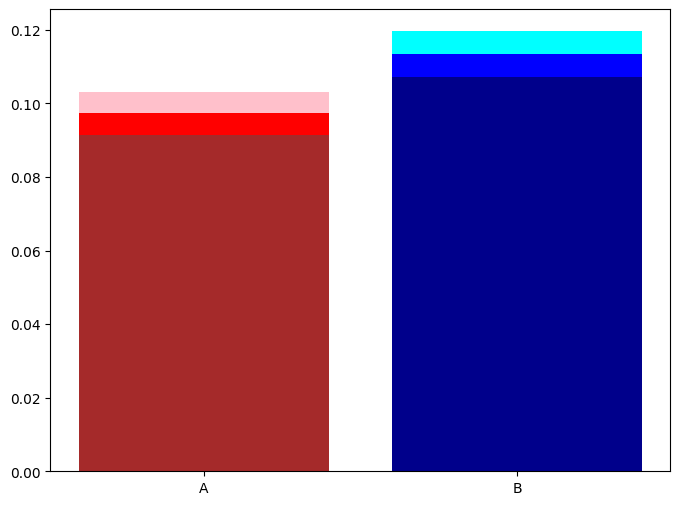

In [24]:
plt.figure(figsize=(8,6))

plt.bar(
    results['Variant'],
    results['CI Upper (95%)'],
    capsize = 5,
    color = ['pink','cyan']
)
plt.bar(
    results['Variant'],
    results['CR(p_hat)'],
    capsize = 5,
    color = ['red','blue']
)
plt.bar(
    results['Variant'],
    results['CI Lower (95%)'],
    capsize = 5,
    color = ['brown','#00008B']
)

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [31]:
count = np.array([success_B,success_A])
nobs = np.array([n_A,n_B])
z_stat, p_value = proportions_ztest(count,nobs,alternative = 'larger')
print(f"Z-statistic : {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

Z-statistic : 3.708
P-value: 0.000


In [33]:
if p_value < 0.05:
    print("Reject H0: Variant B have significantly higher conversion rate then Varient A")
else:
    print("Fai to reject H0: Variant B does not have higher conversion rate then Varient A")
    

Reject H0: Variant B have significantly higher conversion rate then Varient A


In [34]:
import time

In [ ]:
true_p_A,true_p_B = 0.10,0.12
batch_size = 100
n_batches = 60

n_visits_A = n_visits_B = 0
n_succ_A = n_succ_B = 0

batches = []
p_values = []
lifts = []

SD = 0
NSD = 0
for batch in range(1,n_batches+1):
    new_A = np.random.binomial(batch_size,true_p_A)
    new_B = np.random.binomial(batch_size,true_p_B)
    
    n_visits_A += batch_size
    n_visits_B += batch_size
    n_succ_A += new_A
    n_succ_B += new_B
    
    cr_A = n_succ_A/n_visits_A
    cr_B = n_succ_B/n_visits_B
    lift = cr_B - cr_A
    
    count = np.array([n_succ_B,n_succ_A])
    nobs = np.array([n_visits_B,n_visits_A])
    z_stat, p_value = proportions_ztest(count,nobs,alternative = 'larger')
    
    batches.append(batch)
    p_values.append(p_value)
    lifts.append(lift)
    
print(f"Batch {batch}/{n_batches}")
print(f" Variant A: {n_visits_A} visits, {n_succ_A} buys -> CR = {cr_A:.3%}")
print(f" Variant B: {n_visits_B} visits, {n_succ_B} buys -> CR = {cr_B:.3%}")
print(f" Observed lift: {lift:.3%}")
print(f" z-stat = {z_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print(" ✅ Significant lift detected (p<0.05).")
else:
    print(" ❌ No significant lift yet.")

Batch 60/60
 Variant A: 6000 visits, 540 buys -> CR = 9.000%
 Variant B: 6000 visits, 709 buys -> CR = 11.817%
 Observed lift: 2.817%
 z-stat = 5.05, p-value = 0.0000
 ✅ Significant lift detected (p<0.05).


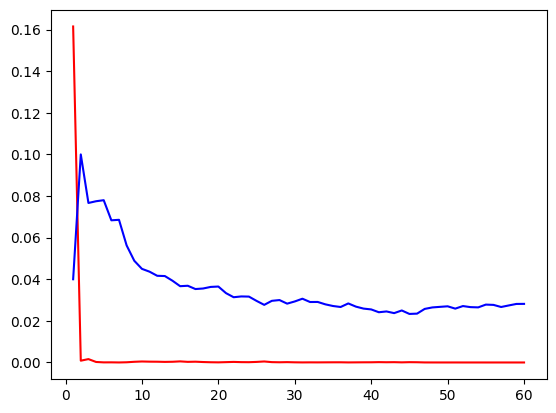

In [46]:
plt.plot(batches,p_values,'-r')
plt.plot(batches,lifts,'-b')
plt.show()